# Personal Key Indicators of Heart Disease

- https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

# Preprocessing

In [9]:
df = pd.read_csv("data/heart_2020_cleaned.csv")

In [10]:
binary_cols = df.columns[df.nunique() == 2]
for col in binary_cols:
    df[col].replace({'No':0,'Yes':1}, inplace=True)
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0


In [11]:
sweet_report = sv.analyze(df,"HeartDisease")
sweet_report.show_html('sweetviz_report.html')

                                             |                                                                …

C:\Users\aluga.com\Desktop\private-repos\python-monorepo\projects\dask_ml_model_example\.venv\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\Users\aluga.com\Desktop\private-repos\python-monorepo\projects\dask_ml_model_example\.venv\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\Users\aluga.com\Desktop\private-repos\python-monorepo\projects\dask_ml_model_example\.venv\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.a

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Feature Enginnering

In [5]:
df['Diabetic'].replace(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'], [1,0,0,0], inplace=True)
df['GenHealth'].replace(['Excellent','Very good', 'Fair', 'Good', 'Poor'],[5,4,3,2,1] ,inplace=True)
df['Race'].replace(['American Indian/Alaskan Native','Black','Asian'], ['White','Other','Hispanic'],inplace=True)
df['AgeCategory'].replace(df['AgeCategory'].unique().tolist(),range(0,df['AgeCategory'].nunique()), inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [6]:
df.groupby(df['BMI'].between(15,25))['HeartDisease'].mean()

BMI
False    0.095155
True     0.065360
Name: HeartDisease, dtype: float64

In [7]:
df['GoodSleep'] = df['SleepTime'].between(5,9).astype(int)
df['GoodBMI'] = df['BMI'].between(15,25).astype(int)
#df.drop(['BMI','SleepTime'],axis=1, inplace=True)

In [8]:
sweet_report = sv.analyze(df,"HeartDisease")
sweet_report.show_html('sweetviz_report.html')

                                             |                                                                …

C:\Users\aluga.com\Desktop\private-repos\python-monorepo\projects\dask_ml_model_example\.venv\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\aluga.com\Desktop\private-repos\python-monorepo\projects\dask_ml_model_example\.venv\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
C:\Users\aluga.com\Desktop\private-repos\python-monorepo\projects\dask_ml_model_example\.venv\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
X = df.drop(['HeartDisease'],axis=1)
y = df[['HeartDisease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [13]:
lr = LogisticRegression(solver='liblinear',class_weight='balanced')
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
print(classification_report(y_pred_lr,y_test))

c:\users\gonca\appdata\local\pypoetry\cache\virtualenvs\python-monorepo-hrojkeze-py3.9\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     44717
           1       0.72      0.21      0.32     19242

    accuracy                           0.74     63959
   macro avg       0.73      0.59      0.58     63959
weighted avg       0.73      0.74      0.68     63959



<AxesSubplot:>

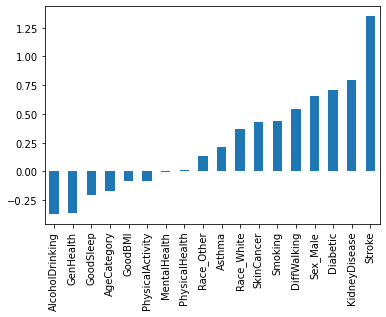

In [31]:
pd.Series(index=lr.feature_names_in_,data=lr.coef_.flatten()).sort_values().plot(kind='bar')